## Homework 5 Implement the Kernelized K-Means 

In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import random
from scipy.spatial.distance import pdist, squareform

In [2]:
class Kernel_KMeans:
    def __init__(self, K=2, gamma = 1, max_iters=100, plot_steps=False):
        self.n_features = None
        self.N = None
        self.X = None
        self.K = K
        self.gamma = gamma
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # Z is a matrix with size N_samples x cluster_number
        # In each row, 1 only occurs at the column representing the cluster, other element are zeros
        # For example, if there are three clusters (K=3), a row [0, 1, 0]
        # means the element belongs to the second cluster 
        self.Z = []
        
    def predict(self, X):
        self.X = X
        # each row of X is a sample, number of columns are number of features 
        self.N, self.n_features = X.shape
        
        # Convert pairwise distances into a square matrix.
        dist = pdist(self.X, 'sqeuclidean')

        # Compute the symmetric kernel matrix.
        Kernel = np.exp(-self.gamma * squareform(dist))
        
        # initialize the Z and clusters
        self.Z = np.zeros((self.N, self.K), dtype=np.int64)
        self.Z[:, 0] = 1
        self.Z[np.argmin(np.sum(self.X * self.X, axis=1)), :] = [0, 1]
        
        # initialize the distance matrix N x K
        # Each row store the distances between each sample and clusters
        D = np.zeros((self.N, self.K), dtype=np.float64)
                
        while True:
            if self.plot_steps:
                self.plot()
                
            N = self.Z.sum(axis=0)
            
            for k in range(self.K):
                D[:, k] = np.diag(Kernel) - (2 / N[k]) * np.sum(np.full((self.N, self.N), self.Z[:, k].T) * Kernel, axis=1) + (1 / N[k] ** 2) * np.sum((self.Z[:, k].reshape(-1, 1) @ self.Z[:, k].reshape(1, -1)) * Kernel)
            
            new_Z = np.zeros_like(self.Z)
            np.put_along_axis(new_Z, np.argmin(D, axis=1, keepdims=True), 1, axis=1)

            if np.array_equal(self.Z, new_Z):
                break

            self.Z = new_Z.copy()

    def plot(self):
        fig, ax = plt.subplots(figsize=(6, 4))
        for k in np.arange(self.K):
            index=np.where(self.Z[:,k]==1)
            point = self.X[index].T
            ax.scatter(*point)

        plt.show()


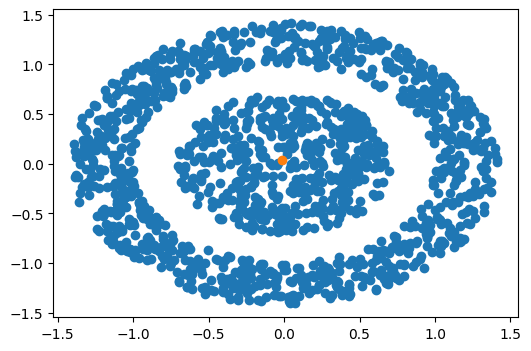

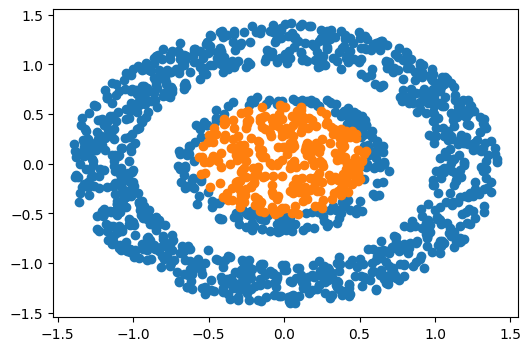

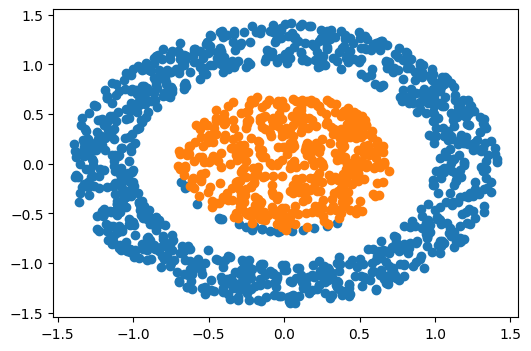

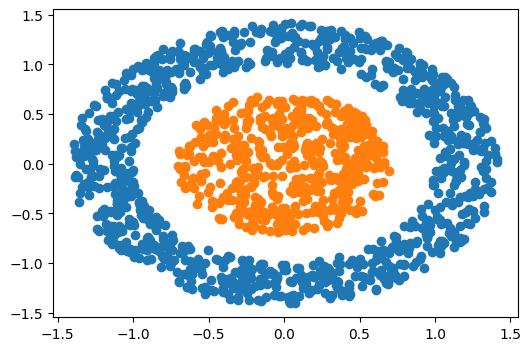

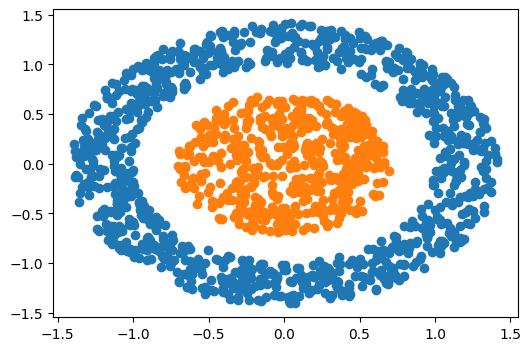

In [3]:
# Testing
import csv
import pandas as pd
from sklearn.datasets import make_moons

#    X, y = make_moons(100, random_state=123)
df = pd.read_csv('X.csv', header=None, skiprows=0, dtype=np.float32)  
X = df.to_numpy()
clusters=2
k = Kernel_KMeans(K=clusters, gamma = 1, max_iters=200, plot_steps=True)
y_pred = k.predict(X)

k.plot()